## Final Project Submission

Please fill out:
* Student name: Gabriel Blatstein
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL:


# Data Obtaining

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
print('Water Front:' , df['waterfront'].unique())
print('View:' , df['view'].unique())
print('Bathrooms:' , df['bathrooms'].unique())
print('Bedrooms:' , df['bedrooms'].unique())
print('Condition' , df['condition'].unique())

Water Front: [nan  0.  1.]
View: [ 0. nan  3.  4.  2.  1.]
Bathrooms: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
Bedrooms: [ 3  2  4  5  1  6  7  8  9 11 10 33]
Condition [3 5 4 1 2]


In [8]:
df['waterfront']= df['waterfront'].astype(str)


In [9]:
df.describe() #Intial observations:
#Waterfront is a categorical variable coded 0 or 1 for whether or not it has a waterfront
#View is also a categorical variable

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.info() #The one variable that jumps out here would be sqft basement, 
#being a object even though all other square foot measurements are integers.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


### Data Cleaning

In [23]:
#Cleaning variables to ensure categorical variables are not taken up as being numerical. Conditions Floors view waterfront
df['bedrooms']= df['bedrooms'].astype("str")
df['condition']= df['condition'].astype("str")
df['view']= df['view'].astype("category")
df['waterfront']= df['waterfront'].astype("category")
df['floors']= df['floors'].astype("category")

#Changing bassement square footage to match data types of other square footages



# df[df['sqft_basement']=='?']= 0
df['sqft_basement']=df['sqft_basement'].astype('int64')



ValueError: invalid literal for int() with base 10: '0.0'

In [12]:
#Double Check variables got changed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null object
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null category
waterfront       21597 non-null category
view             21534 non-null category
condition        21597 non-null object
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(3), float64(5), int64(9), object(4)
memory usage: 3.0

In [13]:
df.isna().sum() #We see here that we will have to take a look at the following variables due to have Null or NaN values.
#In addition we should check to see what variables are categorical vs. quantitative.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
for i in df:
    df.replace(np.NaN, 'NaN', inplace=True)

In [15]:
df.isna().sum() #cleaned all data, there are no more NaN's

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploring Data

In [ ]:
# * **id** - unique identified for a house
# * **dateDate** - house was sold
# * **pricePrice** -  is prediction target
# * **bedroomsNumber** -  of Bedrooms/House
# * **bathroomsNumber** -  of bathrooms/bedrooms
# * **sqft_livingsquare** -  footage of the home
# * **sqft_lotsquare** -  footage of the lot
# * **floorsTotal** -  floors (levels) in house
# * **waterfront** - House which has a view to a waterfront
# * **view** - Has been viewed
# * **condition** - How good the condition is ( Overall )
# * **grade** - overall grade given to the housing unit, based on King County grading system
# * **sqft_above** - square footage of house apart from basement
# * **sqft_basement** - square footage of the basement
# * **yr_built** - Built Year
# * **yr_renovated** - Year when house was renovated
# * **zipcode** - zip
# * **lat** - Latitude coordinate
# * **long** - Longitude coordinate
# * **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
# * **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b272e10>,
      dtype=object)

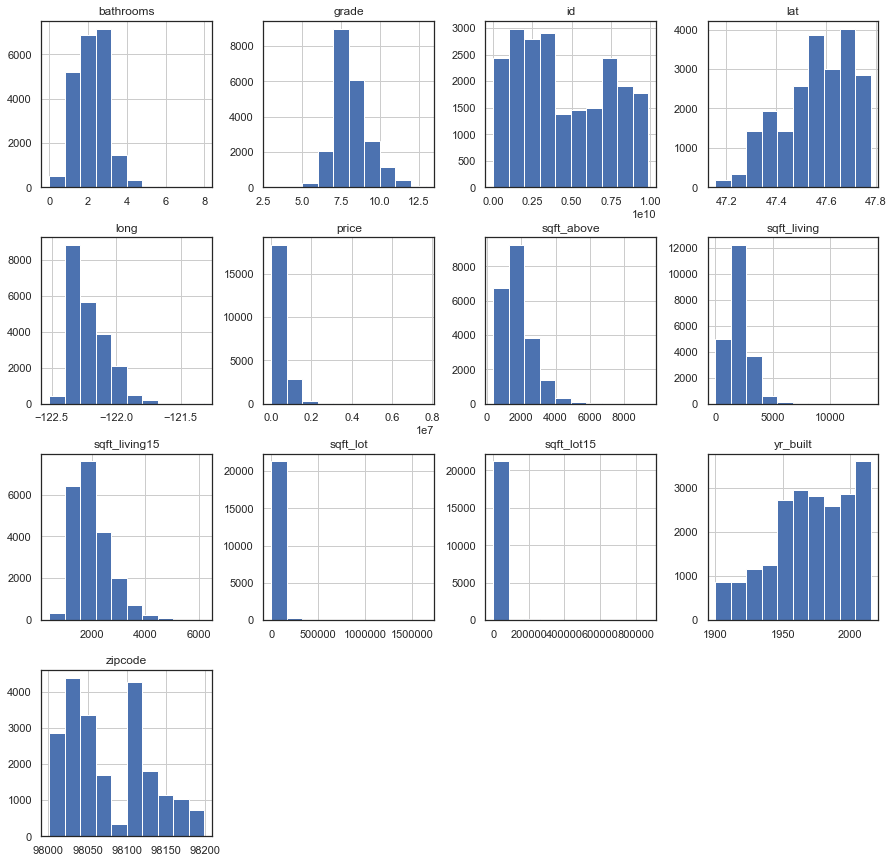

In [24]:
df.hist(figsize=(15,15))

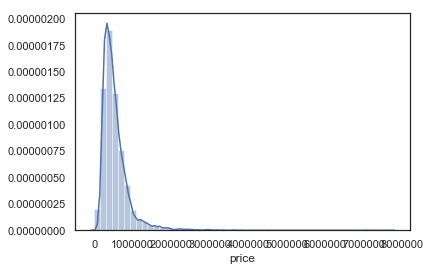

In [30]:
sns.distplot(df['price'])

## Checking for multicollinearity

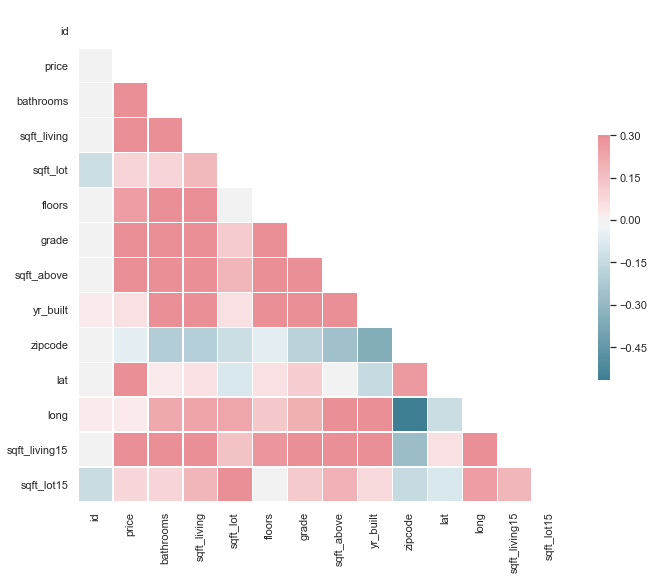

In [18]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [25]:
#Should drop long variable because it is affecting our other variables negatively. 
df_new = df.drop(['long','id'], axis=1)
df_new.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,nan,0,3,7,1180,0.0,1955,0,98178,47.5112,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,2170,400.0,1951,1991,98125,47.7210,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,770,0.0,1933,NaN,98028,47.7379,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,1050,910.0,1965,0,98136,47.5208,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,1680,0.0,1987,0,98074,47.6168,1800,7503


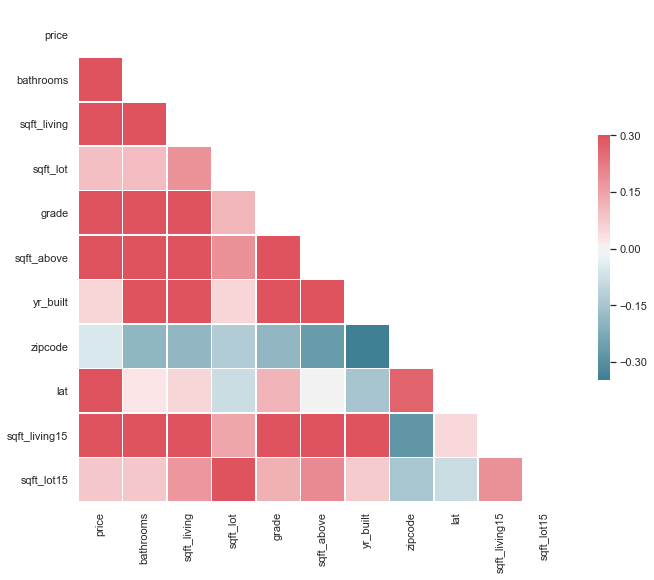

In [26]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df_new.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Modeling Data

In [ ]:
b
# Your code here - remember to use markdown cells for comments as well!

# Interpretation of Data